In [1]:
import pandas as pd

file_path = '/Users/yasserali/Downloads/ds_predicting_bmi.csv'

df = pd.read_csv(file_path)

print(df)

# this first set has the nulls replaces with the column means. Only for column 'pulse_non_null' and 'bp_diastolic_non_null

      SEX_C    AGE  inches   WEIGHT  Pulse_non_null  BP-DIASTOLIC_non_null  \
0       1.0  33.08  68.000  2672.00       84.675439              80.000000   
1       1.0  33.75  60.000  1940.05       84.675439              74.144928   
2       1.0  49.08  62.000  2368.00       84.675439              74.144928   
3       2.0  14.75  66.000  2000.00       70.000000              65.000000   
4       1.0  33.58  65.000  1920.00       84.675439              80.000000   
...     ...    ...     ...      ...             ...                    ...   
1176    2.0  68.33  45.000  2085.00       84.675439              85.000000   
1177    1.0  33.75  62.992  1940.05       84.675439              74.144928   
1178    1.0  69.50  63.000  2000.00       72.000000              65.000000   
1179    2.0  64.42  70.000  2560.00      106.000000              80.000000   
1180    2.0  20.58  66.000  2080.00       87.000000              70.000000   

      PATIENT_RACE_C    BMI  
0               1217  25.39  
1  

In [2]:

# Filter the DataFrame to include only rows with BMI in the range 0 to 70
df = df[(df['BMI'] >= 15) & (df['BMI'] <= 50)]

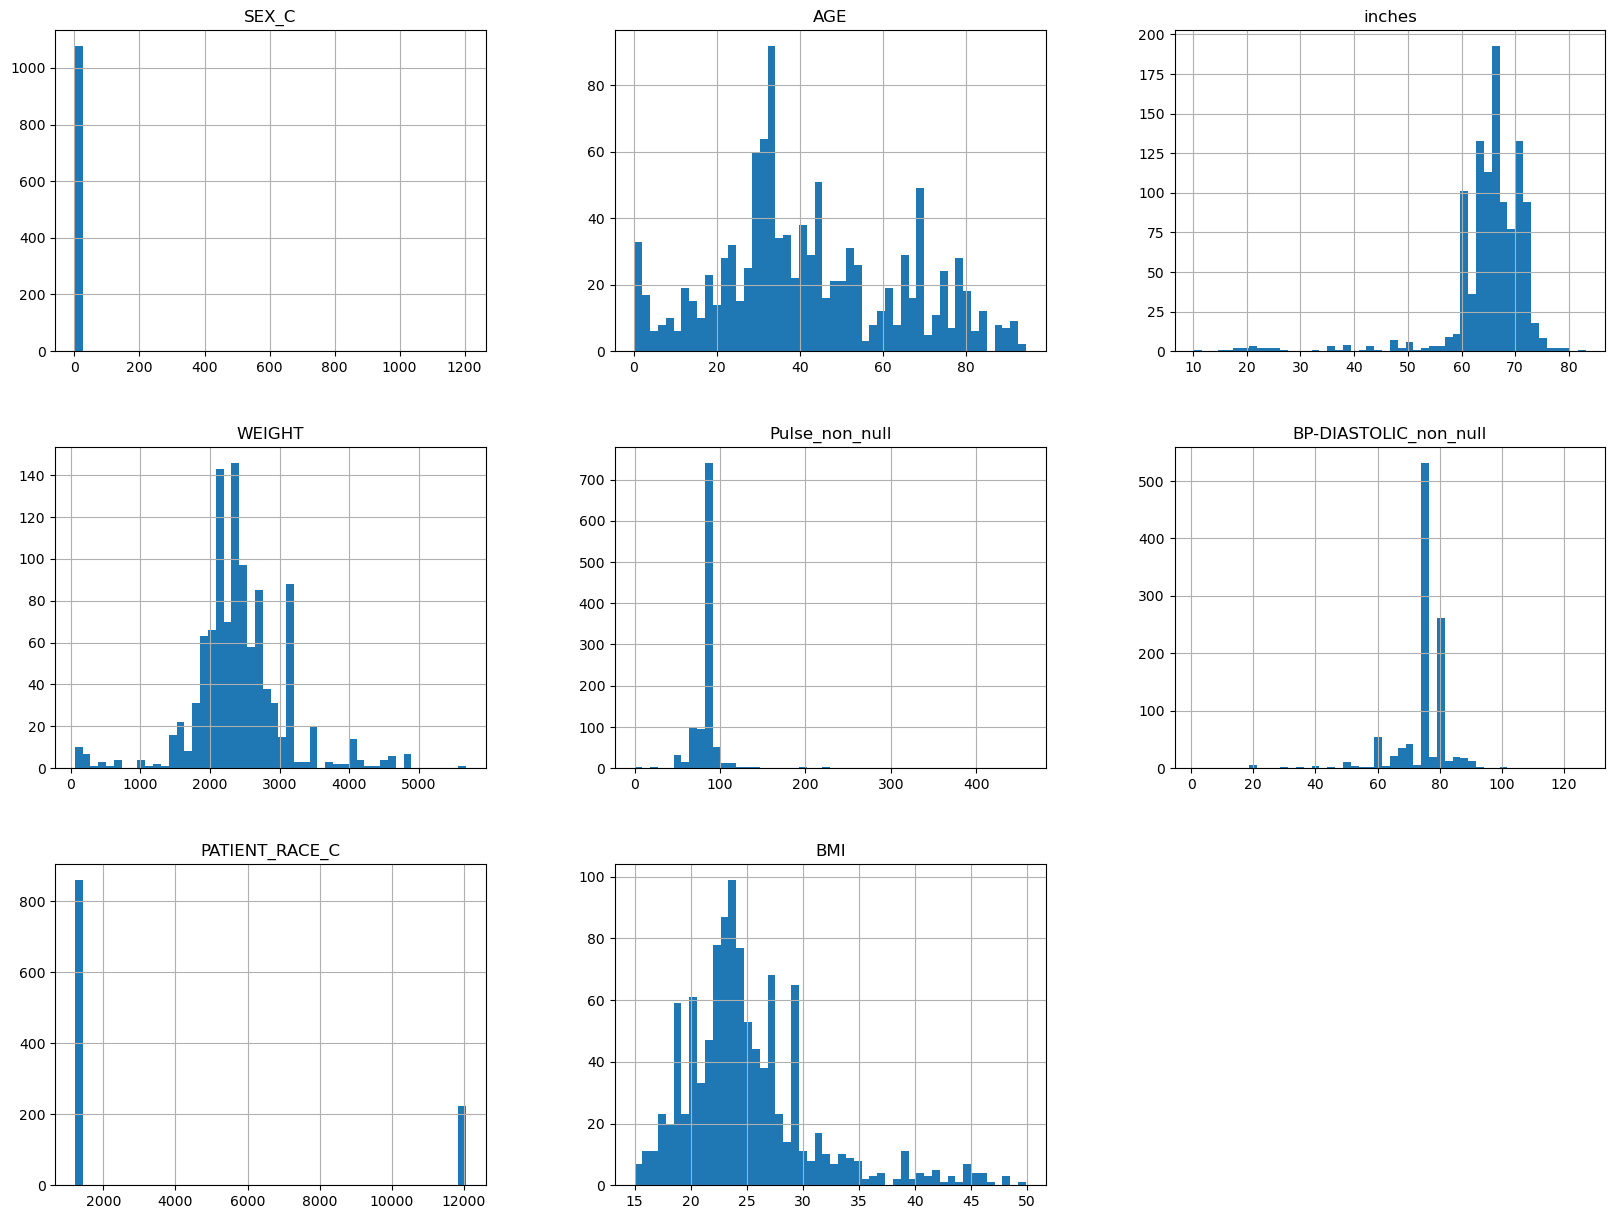

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins = 50, figsize = (20,15))
plt.show()

In [4]:
df

,SEX_C,AGE,inches,WEIGHT,Pulse_non_null,BP-DIASTOLIC_non_null,PATIENT_RACE_C,BMI
0,1.0,33.08,68.000,2672.00,84.675439,80.000000,1217,25.39
1,1.0,33.75,60.000,1940.05,84.675439,74.144928,12028,23.68
2,1.0,49.08,62.000,2368.00,84.675439,74.144928,1213,27.07
3,2.0,14.75,66.000,2000.00,70.000000,65.000000,12028,20.18
4,1.0,33.58,65.000,1920.00,84.675439,80.000000,1214,19.97
...,...,...,...,...,...,...,...,...
1176,2.0,68.33,45.000,2085.00,84.675439,85.000000,1215,45.24
1177,1.0,33.75,62.992,1940.05,84.675439,74.144928,1217,21.48
1178,1.0,69.50,63.000,2000.00,72.000000,65.000000,1213,22.14
1179,2.0,64.42,70.000,2560.00,106.000000,80.000000,1214,22.96


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082 entries, 0 to 1180
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SEX_C                  1080 non-null   float64
 1   AGE                    1082 non-null   float64
 2   inches                 1082 non-null   float64
 3   WEIGHT                 1082 non-null   float64
 4   Pulse_non_null         1082 non-null   float64
 5   BP-DIASTOLIC_non_null  1082 non-null   float64
 6   PATIENT_RACE_C         1082 non-null   int64  
 7   BMI                    1082 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 76.1 KB


In [6]:
df['SEX_C']=df['SEX_C'].astype('category')
df['PATIENT_RACE_C'] = df['PATIENT_RACE_C'].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082 entries, 0 to 1180
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   SEX_C                  1080 non-null   category
 1   AGE                    1082 non-null   float64 
 2   inches                 1082 non-null   float64 
 3   WEIGHT                 1082 non-null   float64 
 4   Pulse_non_null         1082 non-null   float64 
 5   BP-DIASTOLIC_non_null  1082 non-null   float64 
 6   PATIENT_RACE_C         1082 non-null   category
 7   BMI                    1082 non-null   float64 
dtypes: category(2), float64(6)
memory usage: 61.8 KB


In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df)

# Convert the imputed array back to a DataFrame
df_imputed = pd.DataFrame(X_imputed, columns=df.columns)

# Check the DataFrame after imputation
print(df_imputed)

      SEX_C    AGE  inches   WEIGHT  Pulse_non_null  BP-DIASTOLIC_non_null  \
0       1.0  33.08  68.000  2672.00       84.675439              80.000000   
1       1.0  33.75  60.000  1940.05       84.675439              74.144928   
2       1.0  49.08  62.000  2368.00       84.675439              74.144928   
3       2.0  14.75  66.000  2000.00       70.000000              65.000000   
4       1.0  33.58  65.000  1920.00       84.675439              80.000000   
...     ...    ...     ...      ...             ...                    ...   
1077    2.0  68.33  45.000  2085.00       84.675439              85.000000   
1078    1.0  33.75  62.992  1940.05       84.675439              74.144928   
1079    1.0  69.50  63.000  2000.00       72.000000              65.000000   
1080    2.0  64.42  70.000  2560.00      106.000000              80.000000   
1081    2.0  20.58  66.000  2080.00       87.000000              70.000000   

      PATIENT_RACE_C    BMI  
0             1217.0  25.39  
1  

In [9]:
from sklearn.model_selection import train_test_split as tts
train_set, test_set = tts(df_imputed, test_size = 0.2, random_state = 42)

In [10]:
train_X = train_set.iloc[:,:-1] 
train_y = train_set.iloc[:,-1]

test_X = test_set.iloc[:,:-1]
test_y = test_set.iloc[:,-1]

In [11]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [12]:
rnd_reg = RandomForestRegressor(n_estimators=100, random_state=42)
lin_reg = LinearRegression()
svm_reg = SVR()

voting_regressor = VotingRegressor(estimators = [
    ('rf', rnd_reg),
    ('svm_reg', svm_reg),
    ('lin_reg', lin_reg)
])
voting_regressor.fit(train_X, train_y)

VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                            ('svm_reg', SVR()),
                            ('lin_reg', LinearRegression())])

In [13]:
from sklearn.metrics import mean_squared_error as mse, r2_score
y_pred = voting_regressor.predict(test_X)
mse = mse(test_y, y_pred)
r2 = r2_score(test_y, y_pred)
print(f'mse score: {mse}')
print(f'r2 score :{r2}')

mse score: 3.9847006522809476
r2 score :0.8578553167480203


In [14]:
y_pred_df = pd.DataFrame(y_pred, columns = ['Predicted'])
comparison = pd.concat([
    test_y.reset_index(drop = True), y_pred_df
], axis = 1)
comparison

,BMI,Predicted
0,22.14,22.036393
1,21.63,21.825076
2,20.47,21.207257
3,25.14,25.205997
4,24.49,24.726926
...,...,...
212,22.38,22.349773
213,24.60,25.360153
214,18.90,20.096439
215,44.89,40.724052


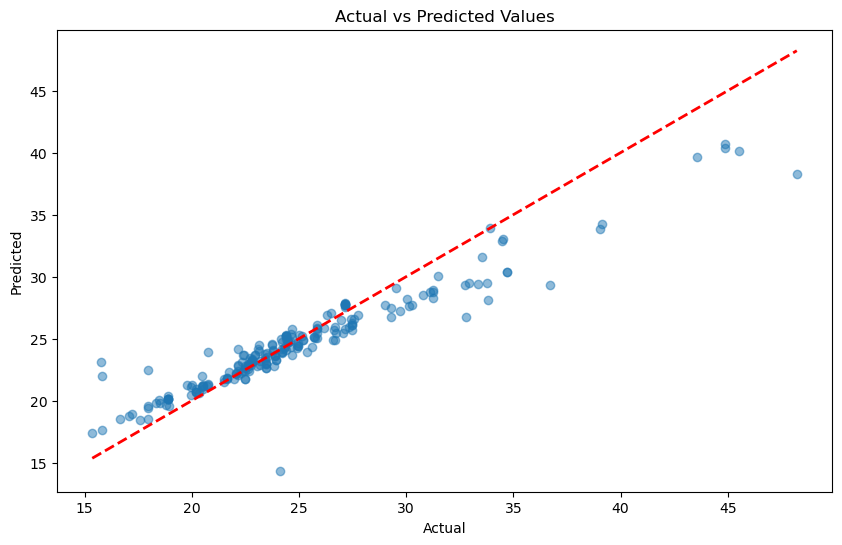

In [15]:
# Plot the actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(test_y, y_pred, alpha=0.5)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

In [16]:
lin_reg.fit(train_X, train_y)
yhat2 = lin_reg.predict(test_X)
r2_score(yhat2, test_y)

0.7773591083137527

In [17]:
rnd_reg.fit(train_X, train_y)
yhat3 = rnd_reg.predict(test_X)
r2_score(yhat3, test_y)

0.9524688364571205

In [18]:
rnd_reg.feature_importances_

array([0.0022897 , 0.0297846 , 0.26618824, 0.68230336, 0.00446745,
       0.00646447, 0.00850218])

In [19]:
for name,score in zip(train_X.columns, rnd_reg.feature_importances_):
    print(name, score)

SEX_C 0.002289700435851444
AGE 0.02978459527996472
inches 0.26618824214184394
WEIGHT 0.6823033599067247
Pulse_non_null 0.004467448781394634
BP-DIASTOLIC_non_null 0.00646447243004692
PATIENT_RACE_C 0.008502181024173626


In [20]:
X_train_red = train_set.iloc[:,2:4] 
y_train = train_set.iloc[:,-1]

X_test_red= test_set.iloc[:,2:4]
y_test = test_set.iloc[:,-1]

In [21]:
rnd_reg.fit(X_train_red, y_train)
yhat_red = rnd_reg.predict(X_test_red)
r2_score(y_test, yhat_red)

0.9800257459738158

In [22]:
y_pred_df = pd.DataFrame(yhat_red, columns = ['Predicted'])
comparison = pd.concat([
    y_test.reset_index(drop = True), y_pred_df
], axis = 1)
comparison

,BMI,Predicted
0,22.14,22.1472
1,21.63,21.6779
2,20.47,20.3801
3,25.14,25.1355
4,24.49,24.4900
...,...,...
212,22.38,22.4170
213,24.60,24.7430
214,18.90,18.9000
215,44.89,44.7972


In [23]:
# good function to easily plot the predicted values against the actual values.

def plot_test_vs_pred(y_test, y_pred):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted Values')
    plt.show()

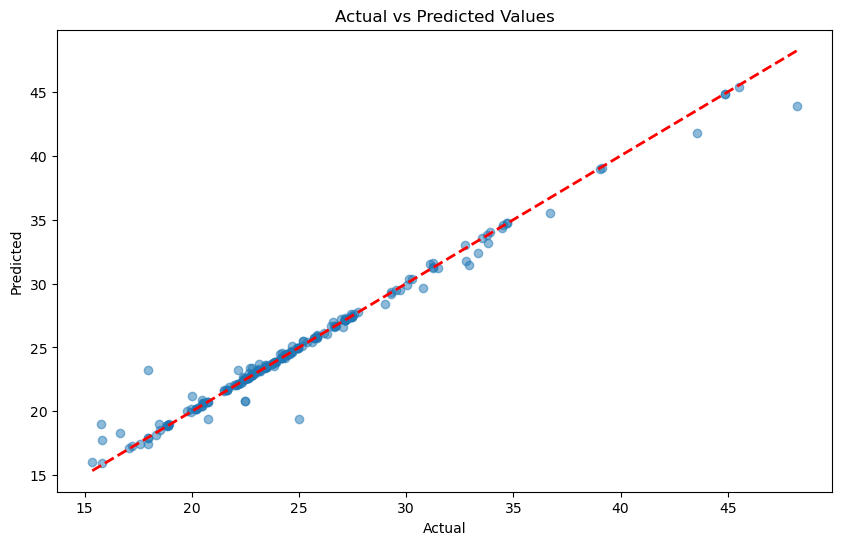

In [24]:
plot_test_vs_pred(y_test, yhat_red)

In [37]:
# this looks very promising, but maybe we are overfitting? now let's use kfold cross validation to get more accurate assessment of our model
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import AdaBoostRegressor

X = df[['inches', 'WEIGHT']]
y = df['BMI']

ada_reg = AdaBoostRegressor(random_state = 42)
rnd_reg = RandomForestRegressor(random_state = 42)

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

# perform cross for for adaboost
ada_scores = cross_val_score(ada_reg, X, y, cv = kf, scoring = 'r2')
print(ada_scores)
print(ada_scores.mean())

rnd_scores = cross_val_score(rnd_reg, X, y, cv = kf, scoring = 'r2')
print(rnd_scores)
print(rnd_scores.mean())

[0.77665792 0.84415376 0.80650163 0.77399387 0.7844153 ]
0.7971444968456843
[0.9818006  0.94056044 0.93867875 0.96655281 0.94062918]
0.9536443549787105


In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV


# Splitting the dataset into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a base estimator
base_estimator = DecisionTreeRegressor(max_depth=3)

# Initialize the AdaBoost model with the base estimator
ada_reg = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 75, 100, 125, 150, 175],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'base_estimator__max_depth': [2, 3, 4, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=ada_reg,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search.fit(train_X, train_y)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
yhat_ada_boost_grid = best_model.predict(test_X)

# Evaluate the model
r2 = r2_score(test_y, yhat_ada_boost_grid)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best AdaBoost R^2 Score:", r2)

/Users/yasserali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/yasserali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/yasserali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/yasserali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/yasserali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be rem

Best Hyperparameters: {'base_estimator__max_depth': 5, 'learning_rate': 0.3, 'n_estimators': 175}
Best AdaBoost R^2 Score: 0.9425501981538357


In [39]:
rf_reg = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_reg,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search.fit(train_X, train_y)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
yhat_rf_grid = best_rf_model.predict(test_X)

# Evaluate the model
r2 = r2_score(test_y, yhat_rf_grid)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Random Forest R^2 Score:", r2)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest R^2 Score: 0.9728902638983725


/Users/yasserali/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1350 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
491 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/yasserali/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yasserali/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/yasserali/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constra

In [ ]:
# the hyperparamter tuning did not give too much of a boost, and could be partially reliant on chance, therefore stick with base model. 